In [181]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from scipy.stats import linregress
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
potholes = pd.read_csv("Resources/311_Service_Requests_-_Pot_Holes_Reported_-_Historical-2016(with_Date_Subtraction.csv")
crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
parks = pd.read_csv("Resources/CPD_Parks.csv")
socio = pd.read_csv("Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")
census = pd.read_csv("Resources/Census-Data-by-Chicago-Community-Area-2016.csv")

In [182]:
potholes.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,Unnamed: 19,Unnamed: 20,Unnamed: 21,Length to fix
0,12/31/16,Completed - Dup,1/20/17,16-08564228,Pothole in Street,NaN,NaN,NaN,2951 W TOUHY AVE,60645.0,...,24.0,2.0,NaN,42.011863,-87.704066,"(42.011863340092, -87.704065711004)",NaN,NaN,NaN,20.0
1,12/31/16,Completed,1/17/17,16-08564309,Pothole in Street,Final Outcome,Pothole Patched,10.0,1335 W DEVON AVE,60660.0,...,24.0,77.0,26.0,41.998038,-87.664387,"(41.998037747035, -87.664387098024)",NaN,NaN,NaN,17.0
2,12/31/16,Completed,1/13/17,16-08560586,Pothole in Street,Final Outcome,Pothole Patched,27.0,131 N CENTRAL AVE,60644.0,...,15.0,25.0,NaN,41.883187,-87.764813,"(41.883186901358, -87.7648132927)",NaN,NaN,NaN,13.0
3,12/31/16,Completed,1/17/17,16-08559206,Pothole in Street,Final Outcome,Pothole Patched,1.0,4920 W FOSTER AVE,60630.0,...,16.0,12.0,NaN,41.975397,-87.751504,"(41.975396932539, -87.751504044466)",NaN,NaN,NaN,17.0
4,12/31/16,Completed,1/9/17,16-08558480,Pothole in Street,Final Outcome,Pothole Patched,16.0,6315 N CICERO AVE,60646.0,...,17.0,12.0,NaN,41.996105,-87.748193,"(41.996105475991, -87.74819337237)",NaN,NaN,NaN,9.0


In [183]:
potholes.drop(['Unnamed: 19', 'Unnamed: 20','Unnamed: 21'], axis=1)

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,Length to fix
0,12/31/16,Completed - Dup,1/20/17,16-08564228,Pothole in Street,NaN,NaN,NaN,2951 W TOUHY AVE,60645.0,1155431.024,1947587.736,50.0,24.0,2.0,NaN,42.011863,-87.704066,"(42.011863340092, -87.704065711004)",20.0
1,12/31/16,Completed,1/17/17,16-08564309,Pothole in Street,Final Outcome,Pothole Patched,10.0,1335 W DEVON AVE,60660.0,1166085.943,1942625.208,48.0,24.0,77.0,26.0,41.998038,-87.664387,"(41.998037747035, -87.664387098024)",17.0
2,12/31/16,Completed,1/13/17,16-08560586,Pothole in Street,Final Outcome,Pothole Patched,27.0,131 N CENTRAL AVE,60644.0,1139027.185,1900419.518,29.0,15.0,25.0,NaN,41.883187,-87.764813,"(41.883186901358, -87.7648132927)",13.0
3,12/31/16,Completed,1/17/17,16-08559206,Pothole in Street,Final Outcome,Pothole Patched,1.0,4920 W FOSTER AVE,60630.0,1142696.290,1934127.197,39.0,16.0,12.0,NaN,41.975397,-87.751504,"(41.975396932539, -87.751504044466)",17.0
4,12/31/16,Completed,1/9/17,16-08558480,Pothole in Street,Final Outcome,Pothole Patched,16.0,6315 N CICERO AVE,60646.0,1143268.975,1941628.410,39.0,17.0,12.0,NaN,41.996105,-87.748193,"(41.996105475991, -87.74819337237)",9.0
5,12/31/16,Completed,1/4/17,16-08562001,Pothole in Street,Final Outcome,Pothole Patched,2.0,2543 S DAMEN AVE,60608.0,1163440.696,1887121.064,25.0,10.0,31.0,NaN,41.845550,-87.675522,"(41.845549957711, -87.675522093081)",4.0
6,12/31/16,Completed,1/9/17,16-08558761,Pothole in Street,Final Outcome,Pothole Patched,2.0,2921 W BELLE PLAINE AVE,60618.0,1156075.365,1927105.615,33.0,17.0,16.0,NaN,41.955659,-87.701718,"(41.955659397156, -87.701717714781)",9.0
7,12/31/16,Completed - Dup,10/6/17,16-08570078,Pothole in Street,NaN,NaN,NaN,941 S WOOD ST,60612.0,1164528.447,1895844.543,27.0,12.0,28.0,NaN,41.869250,-87.671273,"(41.869250074812, -87.671273249197)",279.0
8,12/31/16,Completed,1/19/17,16-08564248,Pothole in Street,Final Outcome,Pothole Patched,16.0,1913 W TOUHY AVE,60626.0,1162218.162,1947851.243,49.0,24.0,1.0,NaN,42.012456,-87.678737,"(42.01245572154, -87.678737254108)",19.0
9,12/31/16,Completed,1/4/17,16-08570117,Pothole in Street,Final Outcome,Pothole Patched,15.0,3115 E 87TH ST,60617.0,1198555.816,1847886.591,10.0,4.0,46.0,NaN,41.737316,-87.548092,"(41.737316336305, -87.548091844142)",4.0


In [184]:
socio.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [185]:
group_potholes = potholes.groupby("Community Area").count()
group_potholes.drop(group_potholes.index[0])
group_potholes.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Unnamed: 19,Unnamed: 20,Unnamed: 21,Length to fix
Community Area,,,,,,,,,,,,,,,,,,,,,
0.0,149,149,149,149,149,82,82,83,149,91,...,149,149,1,148,148,148,0,0,0,139
1.0,701,701,701,701,701,355,355,353,701,701,...,701,701,321,701,701,701,0,0,0,660
2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,...,1603,1603,142,1603,1603,1603,0,0,0,1496
3.0,485,485,485,485,485,373,373,376,485,485,...,485,485,314,485,485,485,0,0,0,462
4.0,632,632,632,632,632,412,412,411,632,632,...,632,632,228,632,632,632,0,0,0,587


In [186]:
group_two_potholes = potholes.groupby("Community Area").mean()

In [187]:
group_two_potholes.head()

,NUMBER OF POTHOLES FILLED ON BLOCK,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,Unnamed: 19,Unnamed: 20,Unnamed: 21,Length to fix
Community Area,,,,,,,,,,,,,
0.0,8.301205,7996.142857,1.140272e+06,1.892750e+06,0.000000,8.597315,19.000000,41.860932,-87.760003,NaN,NaN,NaN,39.244604
1.0,8.971671,60629.620542,1.164523e+06,1.945971e+06,48.052782,24.000000,35.003115,42.007476,-87.670166,NaN,NaN,NaN,98.637879
2.0,9.822768,60614.157205,1.158438e+06,1.943299e+06,46.321273,23.291329,43.000000,42.000316,-87.692631,NaN,NaN,NaN,93.504679
3.0,11.119681,60635.713402,1.168245e+06,1.931537e+06,46.377320,19.463918,32.394904,41.967801,-87.656922,NaN,NaN,NaN,37.298701
4.0,8.527981,60627.637658,1.159395e+06,1.933237e+06,42.215190,19.678797,24.333333,41.972619,-87.689401,NaN,NaN,NaN,75.998296


The r-squared is: -0.15861456004130886


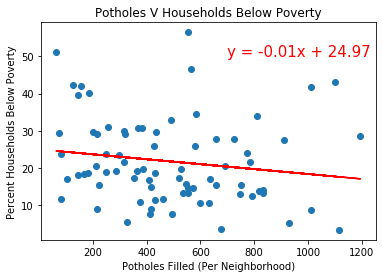

In [188]:
#plot and calculate the linear regression of Potholes filled per block v percent households below poverty 
x_values = group_potholes['NUMBER OF POTHOLES FILLED ON BLOCK']
y_values = socio['PERCENT HOUSEHOLDS BELOW POVERTY']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(700,50),fontsize=15,color="red")
plt.title("Potholes V Households Below Poverty")
plt.xlabel('Potholes Filled (Per Neighborhood)')
plt.ylabel('Percent Households Below Poverty')
print(f"The r-squared is: {rvalue}")
plt.savefig("Regression Analysis of Potholes v Poverty.png")
plt.show()

The r-squared is: -0.04367368877009319


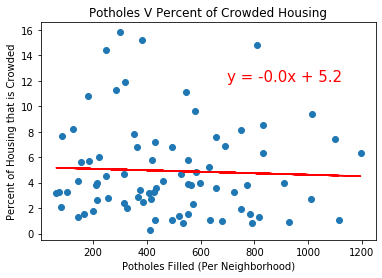

In [189]:
x_values = group_potholes['NUMBER OF POTHOLES FILLED ON BLOCK']
y_values = socio['PERCENT OF HOUSING CROWDED']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(700,12),fontsize=15,color="red")
plt.title("Potholes V Percent of Crowded Housing")
plt.xlabel('Potholes Filled (Per Neighborhood)')
plt.ylabel('Percent of Housing that is Crowded')
print(f"The r-squared is: {rvalue}")
plt.savefig("Graphs PNG/Potholes V Percent of Crowded Housing.png")
plt.show()

The r-squared is: -0.05564141945892094


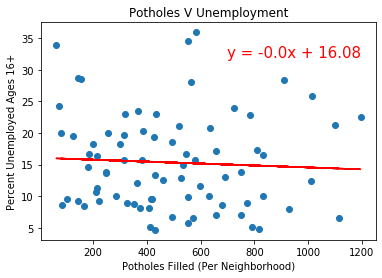

In [190]:
x_values = group_potholes['NUMBER OF POTHOLES FILLED ON BLOCK']
y_values = socio['PERCENT AGED 16+ UNEMPLOYED']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(700,32),fontsize=15,color="red")
plt.title("Potholes V Unemployment")
plt.xlabel('Potholes Filled (Per Neighborhood)')
plt.ylabel('Percent Unemployed Ages 16+')
print(f"The r-squared is: {rvalue}")
plt.savefig("Graphs PNG/Potholes V Unemployment.png")
plt.show()

The r-squared is: -0.1163732409210534


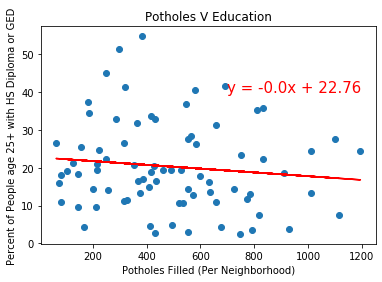

In [191]:
x_values = group_potholes['NUMBER OF POTHOLES FILLED ON BLOCK']
y_values = socio['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(700,40),fontsize=15,color="red")
plt.title("Potholes V Education")
plt.xlabel('Potholes Filled (Per Neighborhood)')
plt.ylabel('Percent of People age 25+ with HS Diploma or GED')
print(f"The r-squared is: {rvalue}")
plt.savefig("Graphs PNG/Potholes V Education.png")
plt.show()

The r-squared is: -0.3449987249104605


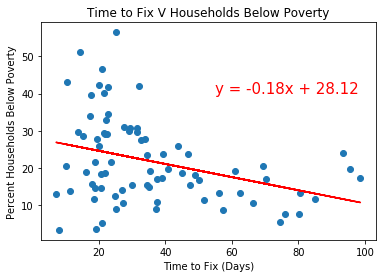

In [192]:
x_values = group_two_potholes['Length to fix']
y_values = socio['PERCENT HOUSEHOLDS BELOW POVERTY']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,40),fontsize=15,color="red")
plt.title("Time to Fix V Households Below Poverty")
plt.xlabel('Time to Fix (Days)')
plt.ylabel('Percent Households Below Poverty')
print(f"The r-squared is: {rvalue}")
plt.savefig("Graphs PNG/Regression Analysis of Potholes v Poverty.png")
plt.show()

The r-squared is: -0.3522381443933649


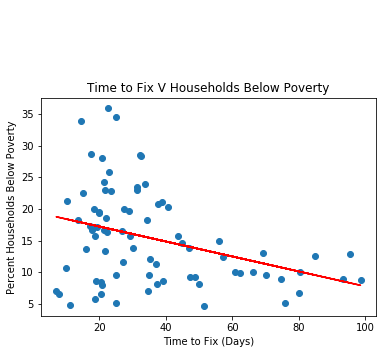

In [193]:
x_values = group_two_potholes['Length to fix']
y_values = socio['PERCENT AGED 16+ UNEMPLOYED']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,50),fontsize=15,color="red")
plt.title("Time to Fix V Households Below Poverty")
plt.xlabel('Time to Fix (Days)')
plt.ylabel('Percent Households Below Poverty')
print(f"The r-squared is: {rvalue}")
plt.savefig("Graphs PNG/Regression Analysis of Potholes v Poverty.png")
plt.show()

In [194]:
group_crime = crime.groupby("Community Area").count()
group_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Community Area,,,,,,,,,,,,,,,,,,,,,
1,869,869,869,869,869,869,869,866,869,869,...,869,869,869,860,860,869,869,860,860,860
2,868,868,868,868,868,868,868,866,868,868,...,868,868,868,864,864,868,868,864,864,864
3,847,847,847,847,847,847,847,838,847,847,...,847,847,847,839,839,847,847,839,839,839
4,525,525,525,525,525,525,525,518,525,525,...,525,525,525,521,521,525,525,521,521,521
5,376,376,376,376,376,376,376,371,376,376,...,376,376,376,372,372,376,376,372,372,372


In [195]:
group_three_potholes = potholes.groupby("Community Area").mean()
group_three_potholes.drop(group_three_potholes.index[0], inplace=True)

The r-squared is: -0.3151090742548489


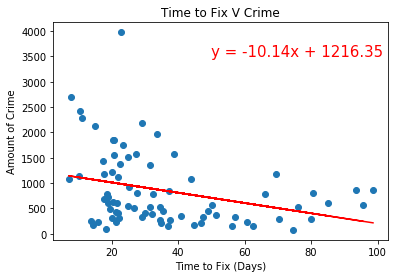

In [179]:
x_values = group_three_potholes['Length to fix']
y_values = group_crime['ID']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,3500),fontsize=15,color="red")
plt.title("Time to Fix V Crime")
plt.xlabel('Time to Fix (Days)')
plt.ylabel('Amount of Crime')
print(f"The r-squared is: {rvalue}")
plt.savefig("Graphs PNG/Time to Fix V Crime v Poverty.png")
plt.show()